In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv('Global Youtube Statistics.csv', encoding='latin')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

rank                    Youtuber  subscribers     video views  \
0     1                    T-Series    245000000 228000000000.00   
1     2              YouTube Movies    170000000            0.00   
2     3                     MrBeast    166000000  28368841870.00   
3     4  Cocomelon - Nursery Rhymes    162000000 164000000000.00   
4     5                   SET India    159000000 148000000000.00   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                    2000000.00   
1           US          Games  ...                           NaN   
2           US  Entertainment  ...                    8000000.00   
3           US      Education  ...                    1000000.00   
4           IN  Entertainment  ...                    1000000.00   

   created_year  created_month  created_date  \
0       2006.00            Mar         13.00   
1       2006.00            Mar          5.00   
2       2012.00            Feb         20.00   
3       2006.00            Sep          1.00   
4       2006.00            Sep         20.00   

   Gross tertiary education enrollment (%)    Population  Unemployment rate  \
0                                    28.10 1366417754.00               5.36   
1                                    88.20  328239523.00              14.70   
2                                    88.20  328239523.00              14.70   
3                                    88.20  328239523.00              14.70   
4                                    28.10 1366417754.00               5.36   

   Urban_population  Latitude  Longitude  
0      471031528.00     20.59      78.96  
1      270663028.00     37.09     -95.71  
2      270663028.00     37.09     -95.71  
3      270663028.00     37.09     -95.71  
4      471031528.00     20.59      78.96  

[5 rows x 28 columns]

In [3]:
#Quantos canais se originaram na Índia entre 2010 e 2012?

qtd_canais_india = df.loc[(df['Country'] == 'India')
                          &(df['created_year'] >= 2010)
                          &(df['created_year'] <= 2012), 'Youtuber'].count()

print(f'Há {qtd_canais_india} originados na Índia entre 2010 e 2012.')

Há 31 originados na Índia entre 2010 e 2012.


In [4]:
#Qual a soma de visualizações dos 5 primeiros canais do ranking?

soma_visualiz = df.loc[df['rank'] <=5, 'video views'].sum()

print(f'Os 5 primeiros canais do ranking somam {soma_visualiz} visualizações.')

Os 5 primeiros canais do ranking somam 568368841870.0 visualizações.


<Axes: ylabel='Country'>

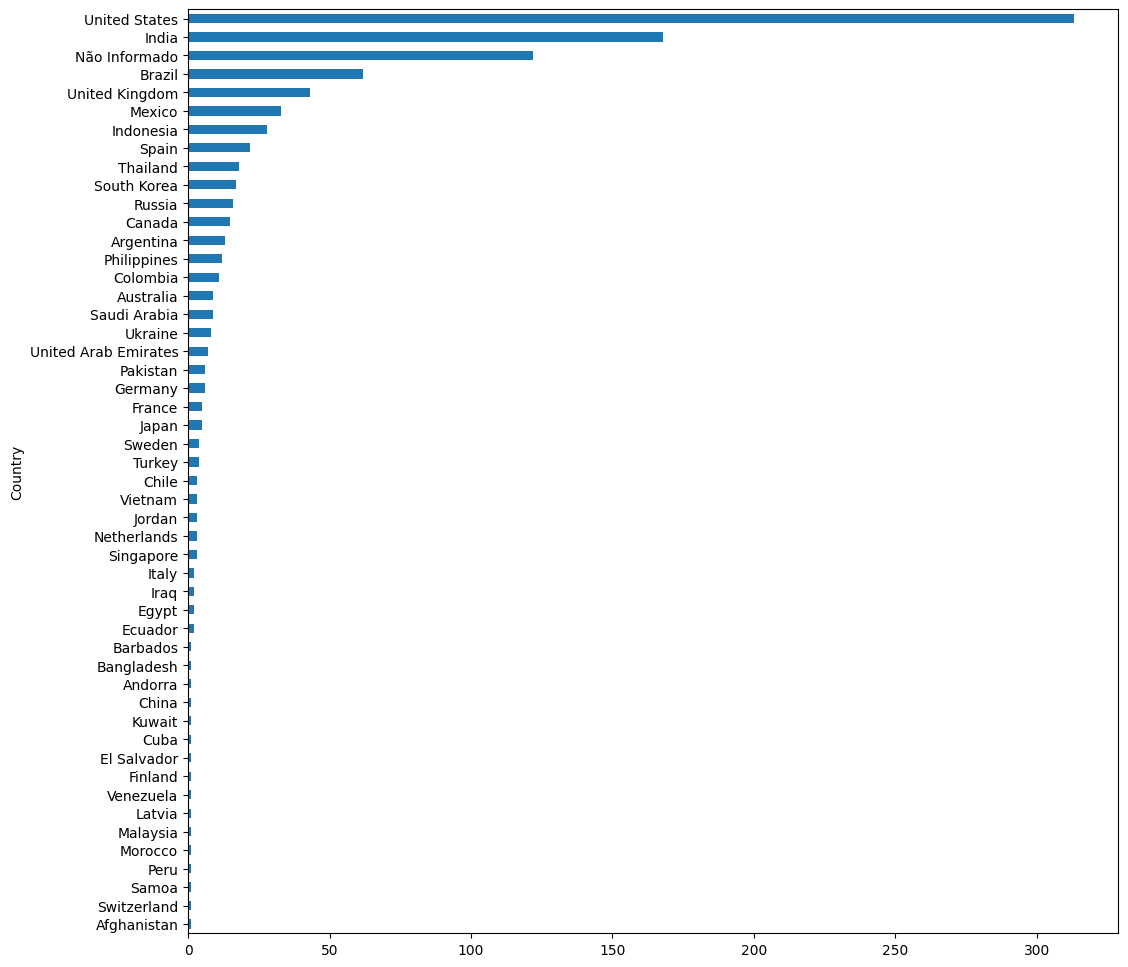

In [5]:
#Qual a distribuição de canais por país? Crie um gráfico para responder à pergunta:

df['Country'] = df['Country'].fillna('Não Informado')

df.groupby('Country').count()['Youtuber'].sort_values().plot.barh(figsize=(12,12))

In [6]:
#Qual o mínimo, médio e máximo de inscritos por categoria?

df['category'] = df['category'].fillna('Não Informado')

df.groupby('category').agg({'subscribers': ['min', 'mean', 'max']})

subscribers                       
                              min        mean        max
category                                                
Autos & Vehicles         14100000 17850000.00   21600000
Comedy                   12300000 20123188.41   44200000
Education                12400000 26542222.22  162000000
Entertainment            12400000 21403319.50  166000000
Film & Animation         12400000 28584782.61  170000000
Gaming                   12300000 20852127.66  111000000
Howto & Style            12400000 19390000.00   80100000
Movies                   22900000 25650000.00   28400000
Music                    12400000 25717821.78  245000000
News & Politics          13400000 20630769.23   57600000
Nonprofits & Activism    16900000 27750000.00   38600000
Não Informado            12300000 23997826.09  119000000
People & Blogs           12300000 21056060.61  112000000
Pets & Animals           13600000 18100000.00   23700000
Science & Technology     12500000 18617647.06   31700000
Shows                    12900000 41615384.62  159000000
Sports                   12300000 27109090.91   96000000
Trailers                 36600000 39000000.00   41400000
Travel & Events          12500000 12500000.00   12500000

<BarContainer object of 995 artists>

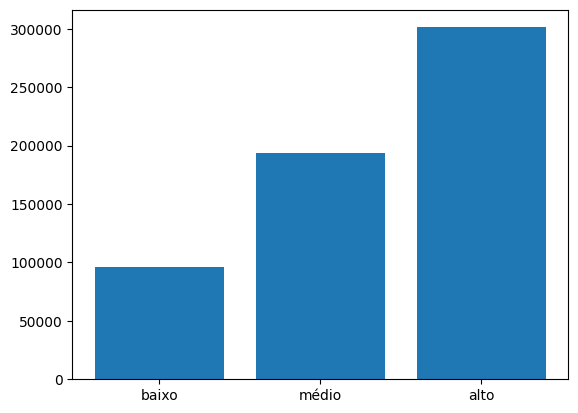

In [7]:
#Qual o volume de uploads por faixa de produção dos canais(quatidade de uploads)? Crie um gráfico para responder à pergunta.

df['faixa_upload'] = pd.cut(df['uploads'], 3, labels=['baixo', 'médio', 'alto'])

plt.bar(data=df, x='faixa_upload', height='uploads')

In [8]:
#Crie um subdataset contendo os nomes das colunas em português e que possibilite responder às perguntas realizadas acima:
df_pt = df.rename(columns={
                          'rank': 'Ranking',
                          'Country': 'País',
                          'created_year': 'Ano de Criação',
                          'video views': 'Visualizações',
                          'category': 'Categoria',
                          'subscribers': 'Inscritos',
                          'uploads': 'Quantidade de Uploads'
})

df_pt = df_pt[['Ranking', 'Youtuber', 'País', 'Ano de Criação', 'Visualizações', 'Categoria', 'Inscritos', 'Quantidade de Uploads']]

df_pt.to_csv('Youtube pt.csv', index=False)